# Credit Risk Analysis and Prediction by Using Machine Learning - IDX Partners

## Import Library

In [115]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization style
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [116]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Description

| Feature | Description | Type | 
| :- | :- | :- |
| id | A unique LC assigned ID for the loan listing | Numerical |
| member_id | A unique LC assigned Id for the borrower member | Numerical |
| loan_amnt | The listed amount of the loan applied by the borrower | Numerical |
| funded_amnt | The total amount committed to that loan at that point in time | Numerical |
| funded_amnt_inv | The total amount committed to that loan by the investors at that point in time | Numerical |
| term | The number of payments on the loan. Values are in months and can be either 36 or 60 | Categorical |
| int_rate | Interest rate on the loan | Numerical |
| installment | The monthly payment owed by the borrower if the loan originates | Numerical |
| grade | LC assigned loan grade | Categorical |
| sub_grade | LC assigned loan subgrade | Categorical |
| emp_title | The job title from the borrower when applying for the loan | Categorical |
| emp_length | Employment length in years | Categorical |
| home_ownership | The home ownership status from the borrower | Categorical |
| annual_inc | The self-reported annual income provided by the borrower during registration | Numerical |
| verification_status | Indicates if the income was verified by LC, not verified, or if the income source was verified | Categorical |
| issue_d | The month which the loan was funded | Categorical |
| loan_status | Loan payment status | Categorical |
| pymnt_plan |Indicates if a payment plan has been put in place for the loan | Categorical |
| url | URL for the LC page with listing data | Categorical |
| desc | Loan description provided by the borrower | Categorical |
| purpose | A category provided by the borrower for the loan request | Categorical |
| title | The loan title provided by the borrower | Categorical |
| zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application | Categorical |
| addr_state | The state provided by the borrower in the loan application | Categorical |
| dti | Total monthly debt payments excluding mortgage and the requested LC loan divided by monthly income | Numerical |
| delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years | Numerical |
| earliest_cr_line | The date the borrower's earliest reported credit line was opened | Categorical |
| inq_last_6mths | The number of inquiries in past 6 months (excluding auto and mortgage inquiries) | Numerical |
| mths_since_last_delinq | The number of months since the borrower's last delinquency | Numerical |
| mths_since_last_record | The number of months since the last public record | Numerical |
| open_acc | Number of open trades | Numerical |
| pub_rec | Number of derogatory public records | Numerical |
|  revol_bal | Total credit revolving balance | Numerical |
| revol_util | Revolving line utilization rate or the amount of credit the borrower is using relative to all available revolving credit | Numerical |
| total_acc | The total number of credit lines currently in the borrower's credit file | Numerical |
| initial_list_status | The initial listing status of the loan | Categorical |
| out_prncp | Remaining outstanding principal for total amount funded | Numerical |
| out_prncp_inv | Remaining outstanding principal for portion of total amount funded by investors | Numerical |
| total_pymnt| Payments received to date for total amount funded | Numerical |
| total_pymnt_inv | Payments received to date for portion of total amount funded by investors | Numerical |
| total_rec_prncp | Principal received to date | Numerical |
| total_rec_int | Interest received to date | Numerical |
| total_rec_late_fee | Late fees received to date | Numerical |
| recoveries | The funds that are recovered by a lender after a borrower has failed to meet their repayment obligations | Numerical |
| collection_recovery_fee | Post charge off collection fee | Numerical |
| last_pymnt_d | Last month payment was received | Categorical |
| last_pymnt_amnt | Last total payment amount received | Numerical |
| next_pymnt_d | Next scheduled payment date | Categorical |
| last_credit_pull_d | The most recent month LC pulled credit for this loan | Categorical |
| collections_12_mths_ex_med | Number of collections in 12 months excluding medical collections | Numerical |
| mths_since_last_major_derog | Months since most recent 90-day or worse rating | Numerical |
| policy_code | publicly available policy_code=1; new products not publicly available policy_code=2 | Numerical |
| application_type | Indicates whether the loan is an individual application or a joint application with two co-borrowers | Categorical |
| annual_inc_joint | The combined self-reported annual income provided by the co-borrowers during registration | Numerical |
| dti_joint | dti for the co-borrowers | Numerical |
| verification_status_joint | Indicates if the co-borrowers joint income was verified by LC, not verified, or if the income source was verified | Categorical |
| acc_now_delinq | The number of accounts on which the borrower is now delinquent | Numerical |
| tot_coll_amt | Total collection amounts ever owed | Numerical |
| tot_cur_bal | Total current balance of all accounts | Numerical |
| open_acc_6m | Number of open trades in last 6 months | Numerical |
| open_il_6m | Number of currently active installment trades | Numerical |
| open_il_12m | Number of installment accounts opened in past 12 months | Numerical |
| open_il_24m | Number of installment accounts opened in past 24 months | Numerical |
| mths_since_rcnt_il | Months since most recent installment accounts opened | Numerical |
| total_bal_il | Total current balance of all installment accounts | Numerical |
| il_util | Ratio of total current balance to high credit/credit limit on all install acct | Numerical |
| open_rv_12m | Number of revolving trades opened in past 12 months | Numerical |
| open_rv_24m | Number of revolving trades opened in past 24 months | Numerical |
| max_bal_bc | Maximum current balance owed on all revolving accounts | Numerical |
| all_util | Balance to credit limit on all trades | Numerical |
| total_rev_hi_lim | Total revolving high credit/credit limit | Numerical |
| inq_fi | Number of personal finance inquiries | Numerical |
| total_cu_tl | Number of finance trades | Numerical |
| inq_last_12m | Number of credit inquiries in past 12 months | Numerical |

## Dataset Info

In [117]:
# Show dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#### Observation:
- Dataset consists of **466285 rows**, **74 features** and **1 Unnamed: 0** column which is the index.
- Dataset consists of **3 data types**: int64, float64, and object.
- The dataset **does not have a target variable** therefore we need to create it first.
- **issue_d**, **last_pymnt_d**, **next_pymnt_d**, **last_credit_pull_d**, and **earliest_cr_line** features should converted into **datetime** data type.
- There are **forty columns** that have **null values**.

## 1. Exploratory Data Analysis

### 1.1. Descriptive Statistics

In [118]:
# Divide columns to the numerical and categorical columns
cats = df.select_dtypes(include = ['object'])
nums = df.select_dtypes(exclude = ['object'])

In [119]:
# Descriptive statistics for numerical column
nums_desc = nums.describe().T
nums_desc['unique'] = nums.nunique()
nums_desc['skewness'] = nums.skew()
nums_desc['upper_bound'] = nums_desc['75%'] + 1.5 * (nums_desc['75%'] - nums_desc['25%'])
nums_desc['lower_bound'] = nums_desc['25%'] - 1.5 * (nums_desc['75%'] - nums_desc['25%'])
nums_desc['has_outliers'] = np.where((nums_desc['min'] < nums_desc['lower_bound']) | (nums_desc['max'] > nums_desc['upper_bound']), 1, 0)
nums_desc[['count', 'mean', 'min', 'lower_bound', '25%', '50%', '75%', 'max', 'upper_bound', 'has_outliers', 'unique', 'skewness']]

,count,mean,min,lower_bound,25%,50%,75%,max,upper_bound,has_outliers,unique,skewness
Unnamed: 0,466285.0,2.331420e+05,0.00,-2.331420e+05,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05,6.994260e+05,0,466285,-1.728895e-15
id,466285.0,1.307973e+07,54734.00,-2.199685e+07,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07,4.636804e+07,0,466285,6.924559e-01
member_id,466285.0,1.459766e+07,70473.00,-2.355305e+07,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07,5.093430e+07,0,466285,6.213935e-01
loan_amnt,466285.0,1.431728e+04,500.00,-1.000000e+04,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04,3.800000e+04,0,1352,7.309799e-01
funded_amnt,466285.0,1.429180e+04,500.00,-1.000000e+04,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04,3.800000e+04,0,1354,7.348454e-01
funded_amnt_inv,466285.0,1.422233e+04,0.00,-9.925000e+03,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04,3.787500e+04,0,9854,7.302504e-01
int_rate,466285.0,1.382924e+01,5.42,2.740000e+00,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01,2.474000e+01,1,506,3.349382e-01
installment,466285.0,4.320612e+02,15.67,-2.081450e+02,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03,1.031415e+03,1,55622,9.492934e-01
annual_inc,466281.0,7.327738e+04,1896.00,-2.094000e+04,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06,1.549000e+05,1,31901,2.956891e+01
dti,466285.0,1.721876e+01,0.00,-5.770000e+00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01,3.991000e+01,1,3997,1.882833e-01


#### Observation:
- There are **no invalid values** among the columns used.
- **Irrelevant features** such as features that have **zero**, **only one**, or **equal to the number of rows** unique values need to be removed.
- Based on the difference between mean and median value as well as skewness values that are **31 columns** that have **right-skewed** distributions (skewness >= 0.5) and **4 columns** that have **left-skewed** distributions (skewness <= -0.5).
- Based on the min and max values there are **28 columns** that have **outliers**.

In [120]:
# Descriptive statistics for categorical column
cats.describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


#### Observation:
- **Irrelevant features** such as features that have **only one** or **equal to the number of rows** unique values need to be removed.
- The number of labels from **emp_title** column will be removed because it has **high cardinality**.
- The **title** and **desc** columns will be removed because they are already represented by the **purpose** column.
- The **zip_code** column will be removed because it is already represented by the **addr_state** column.
- The **date related** features will be engineered into a **more useful features**.
- The **target variable** will be created from the **loan_status** feature.

In [121]:
# Remove irrelevant features
df.drop(columns = ['Unnamed: 0', 'id', 'member_id', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                   'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 
                   'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'emp_title', 'url', 'desc',
                   'title', 'zip_code', 'application_type'], inplace = True)

### 1.2. Target Variable

**Good Loan Status**:
- Fully Paid
- Current
- In Grace Period
- Does not meet the credit policy. Status:Fully Paid

**Bad Loan Status**:
- Late (16-30 days)
- Late (31-120 days)
- Default
- Charged Off
- Does not meet the credit policy. Status:Charged Off

In [122]:
# Create a target variable
df['loan_approved'] = df['loan_status'].isin(['Fully Paid', 'Current', 'In Grace Period', 
                                              'Does not meet the credit policy. Status:Fully Paid']).astype(int)

# Drop the column loan_status
df.drop(columns = 'loan_status', inplace = True)

# Show the number of labels 
df['loan_approved'].value_counts()

1    414099
0     52186
Name: loan_approved, dtype: int64

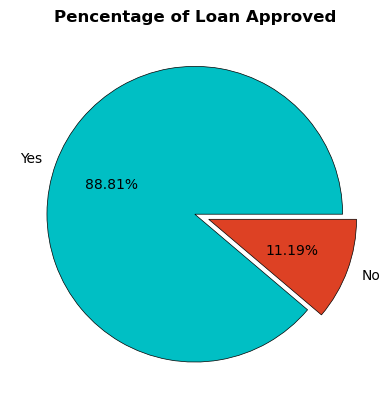

In [123]:
# Create pie chart
plt.pie(x = df['loan_approved'].value_counts(), labels = ['Yes', 'No'], autopct = '%.2f%%', colors = ['#00bfc4', '#dd4124'], 
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, explode = [0, 0.1])

# Add the title
plt.title('Pencentage of Loan Approved', fontsize = 12, fontweight = 'bold')

# Show the graph
plt.show()

In [124]:
# Show the data
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_approved
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN,1


### 1.3. Univariate Analysis

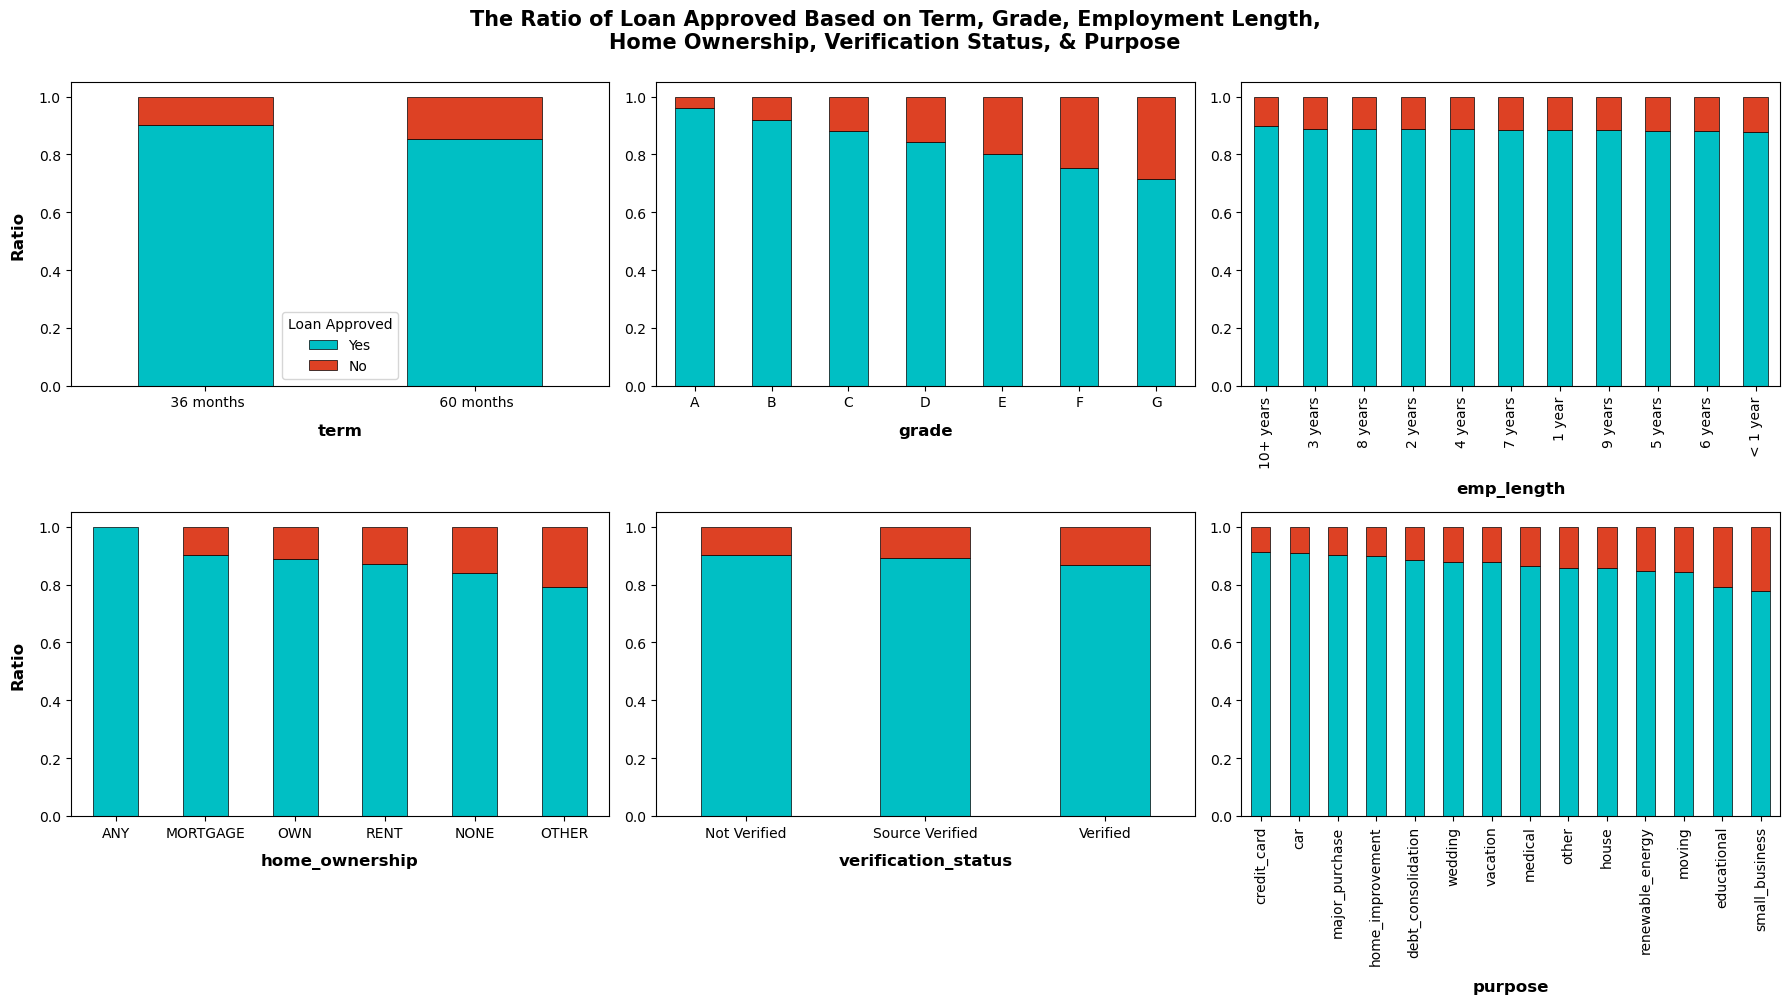

In [125]:
# Adjust image size
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Make the cat_columns list
cat_columns = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']

# Calculate the proportion of loan_approved for the cat_columns list
for i, cat_column in enumerate(cat_columns):
    df_cat = df.groupby([cat_column])['loan_approved'].value_counts(normalize=True).unstack()
    df_cat = df_cat.rename(columns={0: 'No', 1: 'Yes'})
    df_cat = df_cat[['Yes', 'No']]
    df_cat = df_cat.sort_values('Yes', ascending=False)

    # Create a barchart
    ax1 = df_cat.plot.bar(stacked=True, color=['#00bfc4', '#dd4124'], edgecolor='black', linewidth=0.5, ax=ax[i // 3, i % 3])

    # Adjust xticks
    if i not in [2, 5]:
        ax1.set_xticklabels(df_cat.index, rotation=0)

    # Adjust xlabel
    ax1.set_xlabel(cat_column, fontsize=12, fontweight='bold', labelpad=10)

    # Adjust ylabel
    if i in [0, 3]:
        ax1.set_ylabel('Ratio', fontsize=12, fontweight='bold', labelpad=10)
    else:
        ax1.set_ylabel('')

    # Add legend
    if i in [0]:
      ax1.legend(title='Loan Approved', loc='lower center')
    else:
      ax1.get_legend().remove()

# Add title
plt.suptitle('The Ratio of Loan Approved Based on Term, Grade, Employment Length,\nHome Ownership, Verification Status, & Purpose', fontweight='bold', fontsize=15, y=1)

# Show the graph
plt.tight_layout()
plt.show()

#### Observation:
- The **longer** the term, the **higher** the probability of bad credit.
- **Grade A** has the **lowest** probability of bad credit and **Grade G** has the **highest** probability.
- Each **emp_length** has a fairly similar bad credit ratio with the **lowest** being **10+ years** and the **highest** being **< 1 year**.
- **MORTGAGE** home_ownership has a **lower** probability of bad credit than **OWN** and **RENT**.
- Income with **Verified** status actually has the **highest** bad credit ratio.
- The **lowest** probability of bad credit is when the loan is used for a **credit card** and the **highest** is for **small businesses**.

### 1.4. Bivariate Analysis

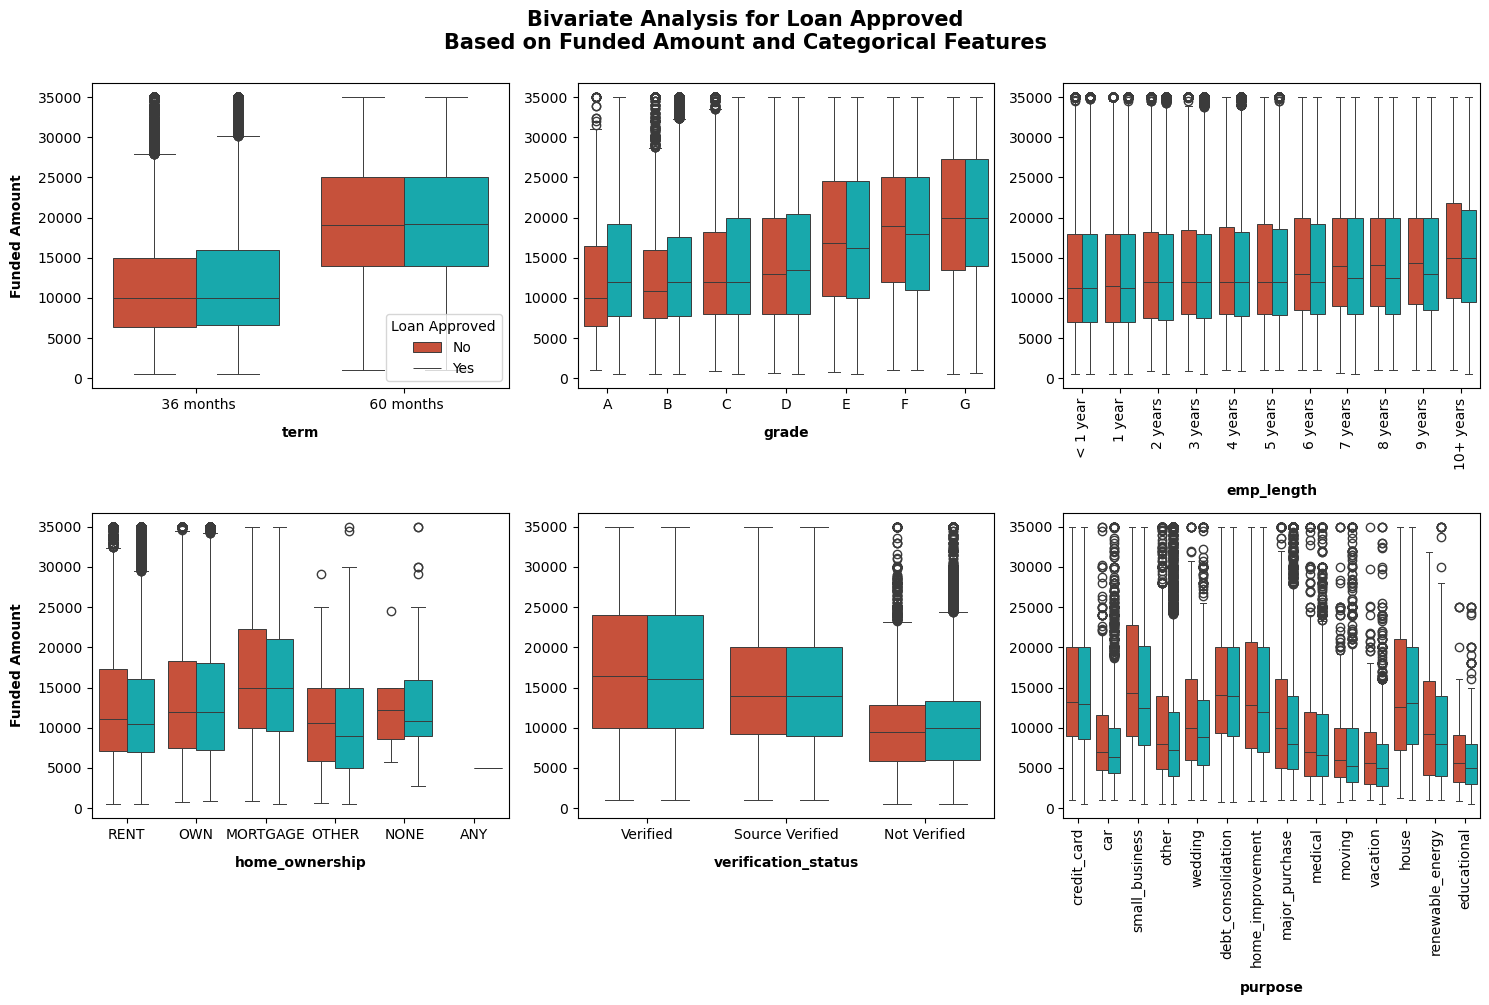

In [126]:
# Adjust image size
plt.figure(figsize=(15, 10))

# Make the cat_columns list
cat_columns = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']

# Custom palette
palette = ['#dd4124', '#00bfc4']

# Create a boxplot
for i in range(6):
    plt.subplot(2, 3, i+1)
    if i == 1:
      ax1 = sns.boxplot(x = cat_columns[i], y = "funded_amnt", data = df, hue = 'loan_approved', palette = palette, 
                        order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], linewidth = 0.7)
    elif i == 2:
      ax1 = sns.boxplot(x = cat_columns[i], y = "funded_amnt", data = df, hue = 'loan_approved', palette = palette, 
                        order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', 
                                 '7 years', '8 years', '9 years', '10+ years'], linewidth = 0.7)
    else:
      ax1 = sns.boxplot(x = cat_columns[i], y = "funded_amnt", data = df, hue = 'loan_approved', palette = palette, linewidth = 0.7)
    
    # Adjust x label
    ax1.set_xlabel(cat_columns[i], fontsize = 10, fontweight = 'bold', labelpad = 10)
    
    # Adjust y label
    if i in [0, 3]:
      ax1.set_ylabel('Funded Amount', fontsize = 10, fontweight = 'bold', labelpad = 10)
    else:
      ax1.set_ylabel('')
    
    # Adjust xticks
    if i in [2, 5]:
      ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
    
    # Add legend
    if i == 0:
      ax1.legend(title='Loan Approved', labels = ['No', 'Yes'], loc='lower right')
    else:
      ax1.get_legend().remove()
      
# Add title
plt.suptitle('Bivariate Analysis for Loan Approved\nBased on Funded Amount and Categorical Features', fontweight='bold', fontsize=15, y=1)
      
# Show the graph
plt.tight_layout()
plt.show()

#### Observation:
- The **longer** the term, the **higher** funded amount.
- **Grade B** has the **lowest** funded amount and **Grade G** has the **highest**.
- The **longer** emp_length, the **higher** funded amount.
- The **highest** funded amount is when home_ownership is **MORTGAGE** instead of **OWN** or **RENT**.
- Income with **Verified** status has the **highest** funded amount and **Not Verified** status has the **lowest**.
- The **highest** funded amount is when the loan is used for a **small business** and the **lowest** is for **vacation**.

## 2. Data Preprocessing

### 2.1. Handle Missing Values

In [127]:
# Show columns with missing values
df_null = pd.DataFrame(df.isnull().sum()).reset_index(names = 'Features')
df_null = df_null.rename(columns={0: 'Null Values'})
df_null[df_null['Null Values'] > 0].reset_index(drop = True)

,Features,Null Values
0,emp_length,21008
1,annual_inc,4
2,delinq_2yrs,29
3,earliest_cr_line,29
4,inq_last_6mths,29
5,mths_since_last_delinq,250351
6,mths_since_last_record,403647
7,open_acc,29
8,pub_rec,29
9,revol_util,340


There are **several treatment** that will be done to **handle missing values** such as:
- Impute the null values with **< 1 year** for the **emp_length** column because we assumed that they don't have any employment experience.
- Impute the null values with **mode** for the **earliest_cr_line**, **last_pymnt_d**, and **last_credit_pull_d** columns.
- Impute the null values with **median** for the **annual_inc**, **delinq_2yrs**, **inq_last_6mths**, **open_acc**, **pub_rec**, **total_acc**, **collections_12_mths_ex_med**, and **acc_now_delinq** columns because they have right-skewed distributions.
- Impute the null values with **mean** for the **revol_util** column because it has almost symmetric distribution.
- **Remove** the **mths_since_last_delinq**, **mths_since_last_record**, **next_pymnt_d**, **mths_since_last_major_derog**, **tot_coll_amt**, **tot_cur_bal**, and **total_rev_hi_lim** columns because they have too many missing values.

In [128]:
# Imputation with < 1 year value
df['emp_length'].fillna('< 1 year', inplace = True)

In [129]:
# Imputation with mode
df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode()[0], inplace = True)
df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0], inplace = True)
df['last_credit_pull_d'].fillna(df['last_credit_pull_d'].mode()[0], inplace = True)

In [130]:
# Imputation with median
df['annual_inc'].fillna(df['annual_inc'].median(), inplace = True)
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(), inplace = True)
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace = True)
df['open_acc'].fillna(df['open_acc'].median(), inplace = True)
df['pub_rec'].fillna(df['pub_rec'].median(), inplace = True)
df['total_acc'].fillna(df['total_acc'].median(), inplace = True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(), inplace = True)
df['acc_now_delinq'].fillna(df['acc_now_delinq'].median(), inplace = True)

In [131]:
# Imputation with mean
df['revol_util'].fillna(df['revol_util'].mean(), inplace = True)

In [132]:
# Remove the columns
df.drop(columns = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 
                   'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace = True)

In [133]:
# Show missing values
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

### 2.2. Duplicated Data

In [134]:
df.duplicated().sum()

0

Dataset **does not have** duplicated data.

### 2.3. Feature Engineering

In [135]:
# Convert data type to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

In [136]:
# Create the Loan Duration columns
df['loan_duration'] = (df['last_pymnt_d'] - df['issue_d']).dt.days

In [137]:
# Create the Credit History Length columns
df['credit_hist_len'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [138]:
# Create the Credit Report Age columns
df['credit_report_age'] = (df['last_credit_pull_d'] - df['issue_d']).dt.days

In [139]:
# Remove the columns that are no longer used
df.drop(columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], inplace = True)

### 2.4. Feature Encoding

In [140]:
# Create new dataset 'data'
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_length                  466285 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466285 non-null  float64
 11  verification_status         466285 non-null  object 
 12  pymnt_plan                  466285 non-null  object 
 13  purpose       

#### 2.4.1. Label Encoding

In [141]:
# Import library
from sklearn.preprocessing import LabelEncoder

# Perform label encoding
data['term'] = LabelEncoder().fit_transform(data['term'])
data['grade'] = LabelEncoder().fit_transform(data['grade'])
data['sub_grade'] = LabelEncoder().fit_transform(data['sub_grade'])
data['emp_length'] = data['emp_length'].map({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
                                             '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                                             '8 years': 8, '9 years': 9, '10+ years': 10})
data['pymnt_plan'] = LabelEncoder().fit_transform(data['pymnt_plan'])
data['initial_list_status'] = LabelEncoder().fit_transform(data['initial_list_status'])

#### 2.4.2. One-Hot Encoding

In [142]:
# Perform one-hot encoding
for cat in ['home_ownership', 'verification_status', 'purpose', 'addr_state']:
  df1 = pd.get_dummies(data[cat], prefix=cat)
  data  = data.drop(cat, axis = 1)
  data  = data.join(df1)

In [143]:
# Show the data
data.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,loan_approved,loan_duration,credit_hist_len,credit_report_age,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000,5000,4975.0,0,10.65,162.87,1,6,10,24000.0,0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,0.0,1,1127,9830,1492,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,1,15.27,59.83,2,13,0,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,0.0,0,487,4627,640,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,0,15.96,84.33,2,14,10,12252.0,0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,0.0,0.0,1,913,3682,1492,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2.5. Feature Selection

For feature selection, we will first calculate the **mutual information score** for each feature and select the **top 30 features** that contain useful information for predicting the target variable. After that, we will calculate the **Pearson correlation** to see whether among the 30 features there is **multicollinearity** or **high correlation** (> 0.7) or not and choose the **top 20 features** among them.

#### 2.5.1. Mutual Information

In [144]:
# Import library
from sklearn.feature_selection import mutual_info_classif

# Divide dataset to feature and target
X = data.drop(columns = 'loan_approved')
y = data['loan_approved']

# Perform mutual information
mutual_info_scores = mutual_info_classif(X, y)

In [80]:
# Create new DataFrame for the mutual information result
df_mi = pd.DataFrame({'Features': X.columns, 'MI Scores': mutual_info_scores})
df_mi.sort_values('MI Scores', ascending = False, ignore_index = True, inplace = True)
df_mi

,Features,MI Scores
0,recoveries,0.127666
1,total_rec_prncp,0.125573
2,collection_recovery_fee,0.120969
3,purpose_debt_consolidation,0.070083
4,home_ownership_MORTGAGE,0.064991
5,last_pymnt_amnt,0.061538
6,total_pymnt,0.050472
7,loan_duration,0.048970
8,total_pymnt_inv,0.048554
9,home_ownership_RENT,0.040591


#### 2.5.2. Pearson Correlation

In [81]:
# Select the 30 best features
top_features = df_mi['Features'].iloc[:30].tolist()
data_corr = data[top_features]
data_corr.head()

,recoveries,total_rec_prncp,collection_recovery_fee,purpose_debt_consolidation,home_ownership_MORTGAGE,last_pymnt_amnt,total_pymnt,loan_duration,total_pymnt_inv,home_ownership_RENT,out_prncp,out_prncp_inv,initial_list_status,verification_status_Verified,grade,verification_status_Not Verified,verification_status_Source Verified,int_rate,emp_length,term,credit_report_age,sub_grade,total_rec_int,purpose_credit_card,installment,total_rec_late_fee,inq_last_6mths,addr_state_CA,loan_amnt,funded_amnt
0,0.00,5000.00,0.00,0,0,171.62,5861.071414,1127,5831.78,1,0.0,0.0,0,1,1,0,0,10.65,10,0,1492,6,861.07,1,162.87,0.00,1.0,0,5000,5000
1,117.08,456.46,1.11,0,0,119.66,1008.710000,487,1008.71,1,0.0,0.0,0,0,2,0,1,15.27,0,1,640,13,435.17,0,59.83,0.00,5.0,0,2500,2500
2,0.00,2400.00,0.00,0,0,649.91,3003.653644,913,3003.65,1,0.0,0.0,0,0,2,1,0,15.96,10,0,1492,14,603.65,0,84.33,0.00,2.0,0,2400,2400
3,0.00,10000.00,0.00,0,0,357.48,12226.302210,1127,12226.30,1,0.0,0.0,0,0,2,0,1,13.49,10,0,1127,10,2209.33,0,339.31,16.97,1.0,1,10000,10000
4,0.00,2233.10,0.00,0,0,67.79,3242.170000,1492,3242.17,1,766.9,766.9,0,0,1,0,1,12.69,1,1,1492,9,1009.07,0,67.79,0.00,0.0,0,3000,3000


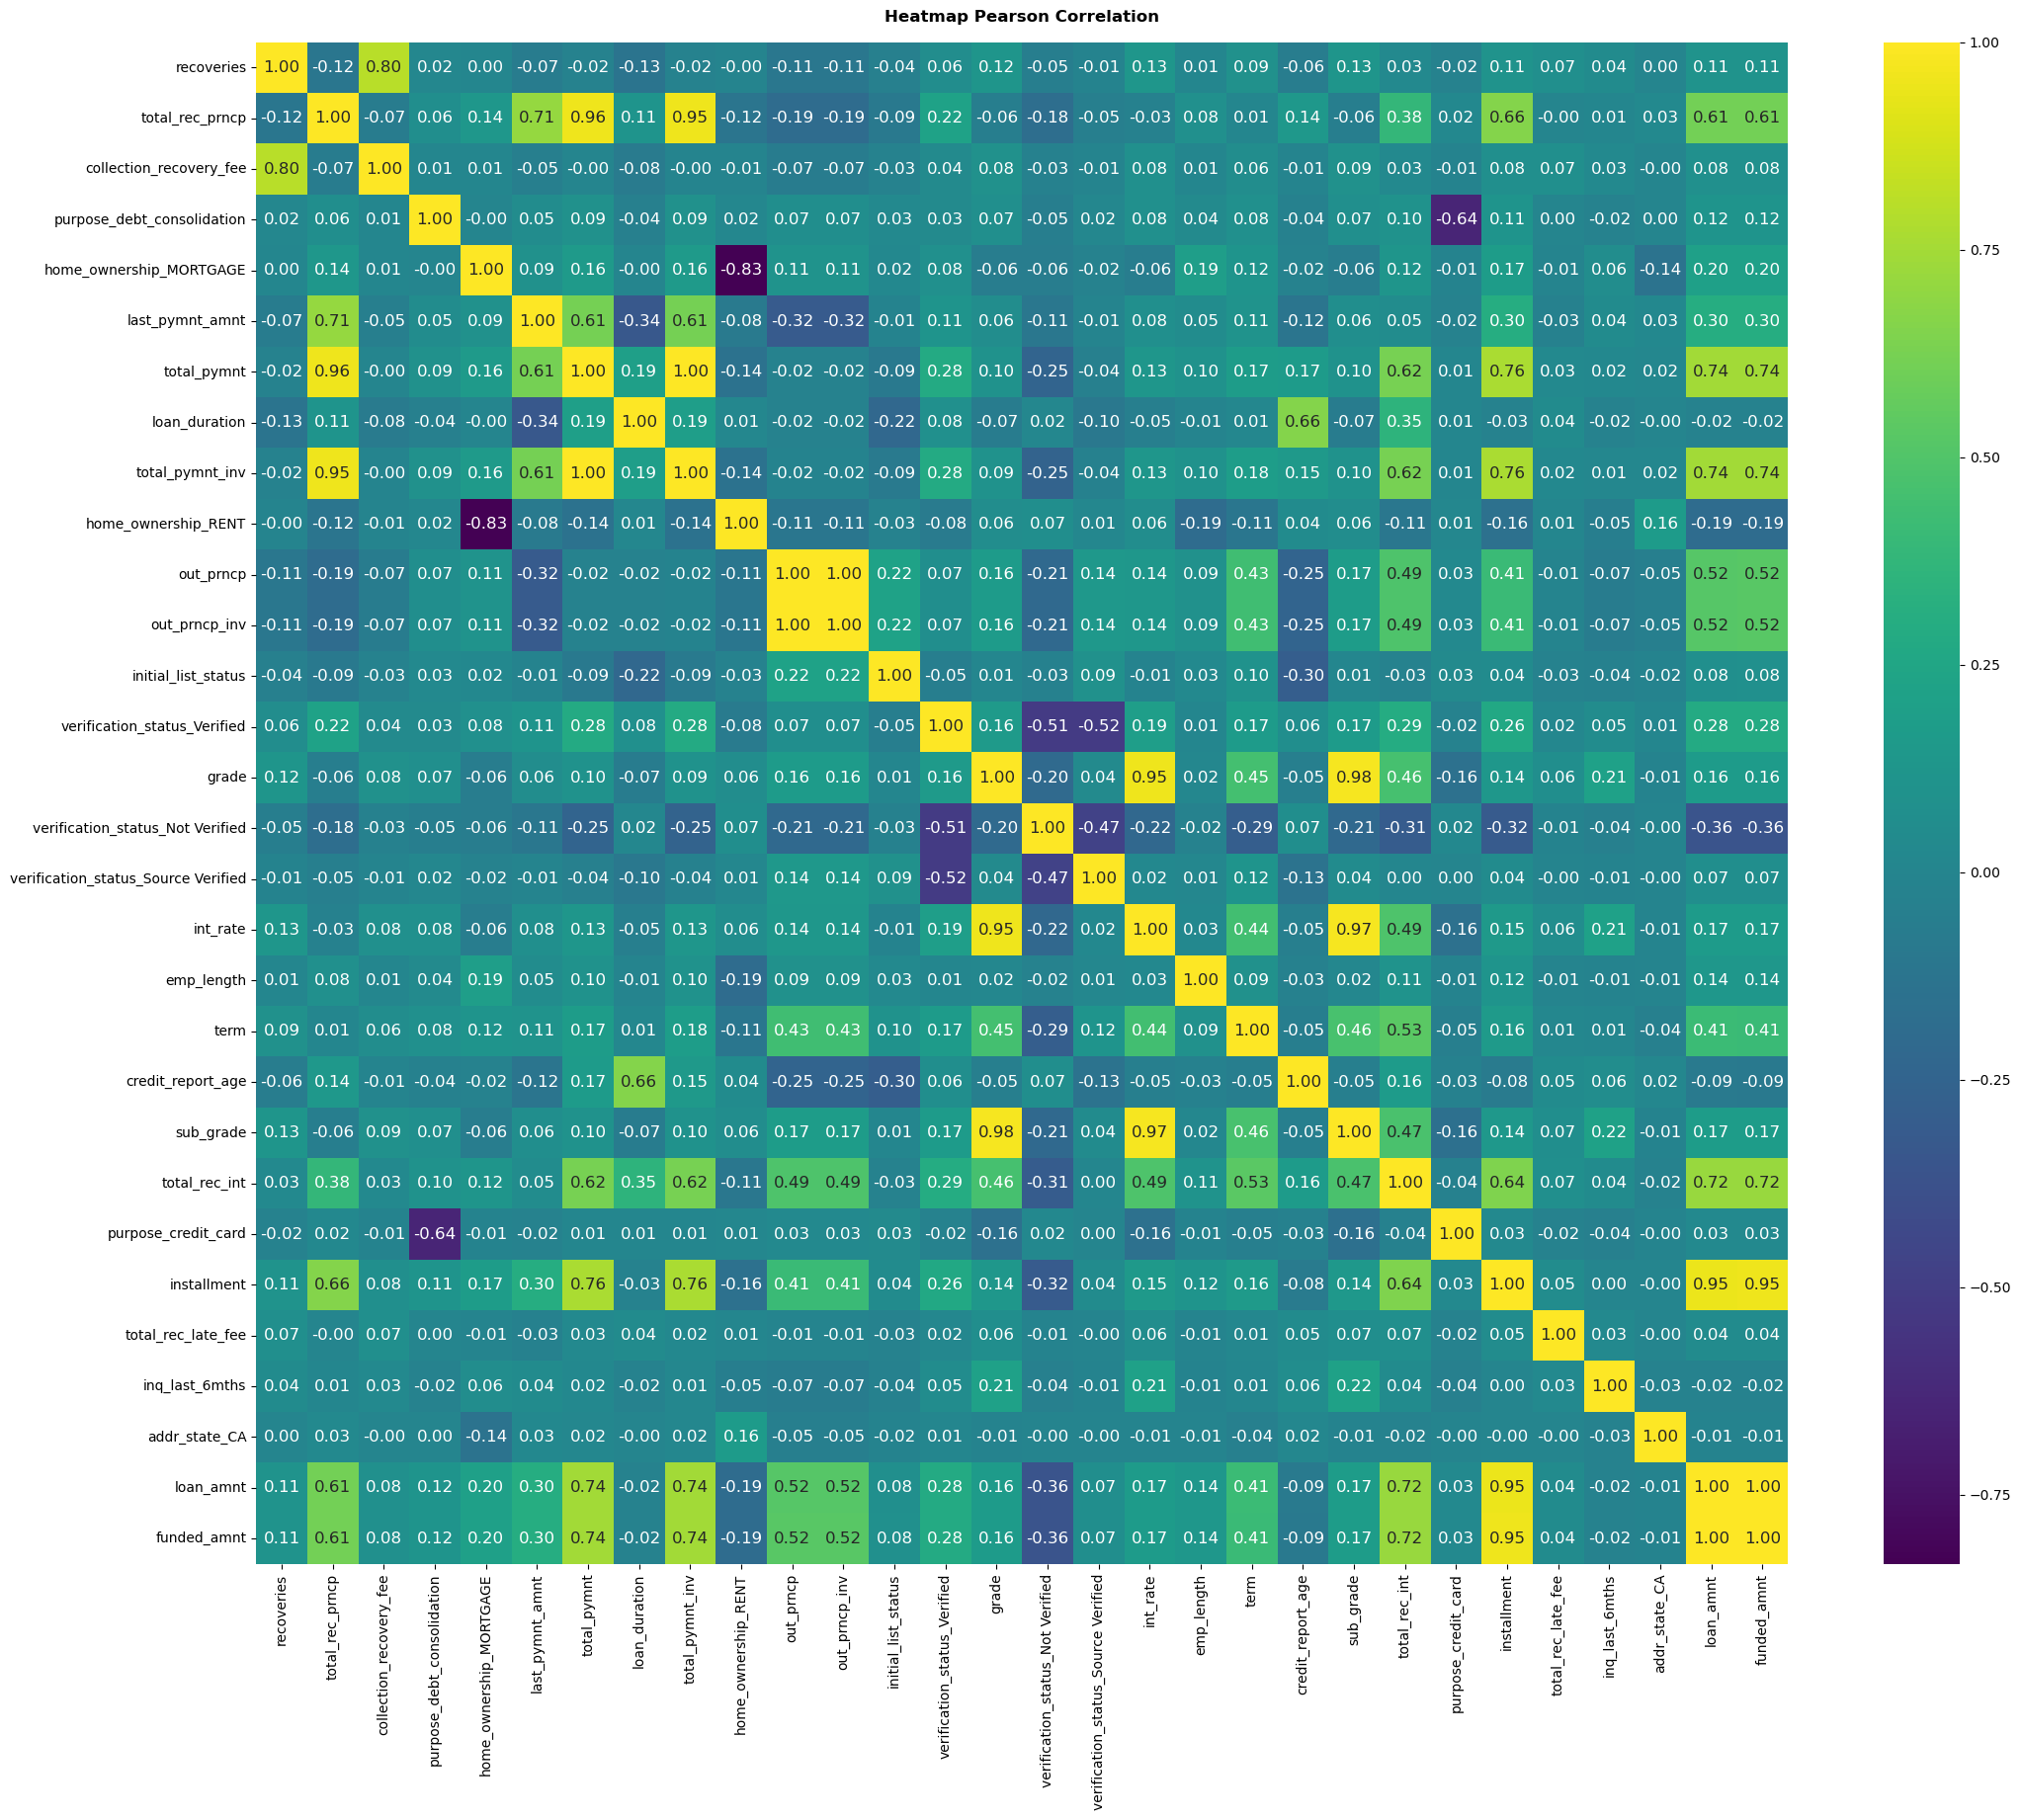

In [82]:
# Create a heatmap for correlation values
plt.figure(figsize=(25, 20))
sns.heatmap(data_corr.corr(), cmap='viridis', annot= True, fmt='.2f', annot_kws={'size': 12})
plt.title('Heatmap Pearson Correlation', pad = 15, fontweight = 'bold')
plt.show()

From the heatmap above, we can see there are features that have **multicollinearity** or **high correlation (> 0.7)** between each other. Therefore based on **mutual information score**, between the **recoveries** and **collection_recovery_fee** features we will choose the **recoveries** feature. Then, between the **total_rec_prncp**, **total_pymnt**, **total_pymnt_inv**, and **last_pymnt_amnt** features we will choose the **total_rec_prncp** feature. 

Meanwhile, between the **out_prncp** and **out_prncp_inv** features we will choose the **out_prncp** feature. Between the **grade**, **int_rate**, and **sub_grade** features we will choose the **grade** feature. And the last, between the **total_rec_int**, **loan_amnt**, and **funded_amnt** features we will choose **total_rec_int** feature. We will also drop the **addr_state_CA** feature, because we only need 20 features for modeling process.

In [83]:
# Feature selection
data_final = data_corr.drop(columns = ['collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt',
                                       'out_prncp_inv', 'int_rate', 'sub_grade', 'loan_amnt', 'funded_amnt', 'addr_state_CA'])

In [84]:
# Show the data
data_final.head()

,recoveries,total_rec_prncp,purpose_debt_consolidation,home_ownership_MORTGAGE,loan_duration,home_ownership_RENT,out_prncp,initial_list_status,verification_status_Verified,grade,verification_status_Not Verified,verification_status_Source Verified,emp_length,term,credit_report_age,total_rec_int,purpose_credit_card,installment,total_rec_late_fee,inq_last_6mths
0,0.00,5000.00,0,0,1127,1,0.0,0,1,1,0,0,10,0,1492,861.07,1,162.87,0.00,1.0
1,117.08,456.46,0,0,487,1,0.0,0,0,2,0,1,0,1,640,435.17,0,59.83,0.00,5.0
2,0.00,2400.00,0,0,913,1,0.0,0,0,2,1,0,10,0,1492,603.65,0,84.33,0.00,2.0
3,0.00,10000.00,0,0,1127,1,0.0,0,0,2,0,1,10,0,1127,2209.33,0,339.31,16.97,1.0
4,0.00,2233.10,0,0,1492,1,766.9,0,0,1,0,1,1,1,1492,1009.07,0,67.79,0.00,0.0


### 2.6. Split Data

In [105]:
# Divide dataset to feature and target
X = data_final
y = data['loan_approved']

# Perform data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### 2.7. Standardization

In [106]:
# Import library
from sklearn.preprocessing import StandardScaler

# Initiate a Standard scaler
scaler = StandardScaler()

# Create list of column to standardize
column_list = ['recoveries', 'total_rec_prncp', 'loan_duration', 'out_prncp', 'grade', 'emp_length', 
               'credit_report_age', 'total_rec_int', 'installment', 'inq_last_6mths', 'total_rec_late_fee']

# Perform scaling process
for col in column_list:
    scaler.fit(X_train[[col]])
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

In [107]:
# Show the X_train
X_train.head(3)

,recoveries,total_rec_prncp,purpose_debt_consolidation,home_ownership_MORTGAGE,loan_duration,home_ownership_RENT,out_prncp,initial_list_status,verification_status_Verified,grade,verification_status_Not Verified,verification_status_Source Verified,emp_length,term,credit_report_age,total_rec_int,purpose_credit_card,installment,total_rec_late_fee,inq_last_6mths
368118,-0.155496,-0.902508,0,1,-1.353461,0,-0.694065,1,0,-0.618694,1,0,1.137456,0,-0.435646,-0.660222,1,0.262607,-0.123271,-0.736761
249237,-0.155496,-1.040046,1,0,-0.731239,1,0.793554,1,0,1.656135,0,1,-0.992425,1,-0.857027,-0.152999,0,-0.577682,-0.123271,0.177000
181464,-0.155496,2.293589,1,1,0.836348,0,-0.694065,0,1,0.139582,0,0,1.137456,0,1.070862,1.202756,0,1.752672,-0.123271,1.090761


In [108]:
# Show the X_test
X_test.head(3)

,recoveries,total_rec_prncp,purpose_debt_consolidation,home_ownership_MORTGAGE,loan_duration,home_ownership_RENT,out_prncp,initial_list_status,verification_status_Verified,grade,verification_status_Not Verified,verification_status_Source Verified,emp_length,term,credit_report_age,total_rec_int,purpose_credit_card,installment,total_rec_late_fee,inq_last_6mths
362514,-0.155496,3.360023,0,1,-0.518102,0,-0.694065,0,1,0.139582,0,0,-1.524896,1,-0.771649,1.258347,0,1.401524,-0.123271,-0.736761
288564,-0.155496,-1.007332,0,1,-0.518102,0,0.757316,1,1,1.656135,0,0,1.137456,1,-0.771649,0.030818,1,-0.552409,-0.123271,-0.736761
213591,-0.155496,3.004545,1,1,-1.353461,0,-0.694065,0,1,0.139582,0,0,-1.258661,0,-1.278408,-0.080369,0,2.477445,-0.123271,-0.736761


## 3. Modeling

### 3.1. Initiate Algorithms

In [109]:
# Import library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import time

# Instantiation machine learning algorithm
lr = LogisticRegression(random_state = 42)
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state = 42)
ada = AdaBoostClassifier(random_state = 42)
gb = GradientBoostingClassifier(random_state = 42)
et = ExtraTreesClassifier (random_state = 42)

# Create the models list
models = [lr, dt, rf, ada, gb, et]

### 3.2. Model Training & Validation

We will choose **precision** as our main metric because we want to minimize the **false positive**, namely people who were predicted to be able to repay the loans but apparently cannot. This is because the losses from **giving loans** to people who are **unable to repay** the loans are much greater than **not giving loans** to people who are **able to pay** the loans.

In [110]:
# Create list for the result
result = []

# Model training and validation
for model in models:
    start = time.time()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train.values)
    y_pred = model.predict(X_test.values)
    
    accuracy_train = round(accuracy_score(y_train, y_pred_train), 5)
    accuracy_test = round(accuracy_score(y_test, y_pred), 5)
    
    precision_train = round(precision_score(y_train, y_pred_train), 5)
    precision_test = round(precision_score(y_test, y_pred), 5)
    
    recall_train = round(recall_score(y_train, y_pred_train), 5)
    recall_test = round(recall_score(y_test, y_pred), 5)
    
    roc_auc_train = round(roc_auc_score(y_train, y_pred_train), 5)
    roc_auc_test = round(roc_auc_score(y_test, y_pred), 5)
    end = time.time()
    
    result.append([accuracy_train, accuracy_test, precision_train, precision_test, recall_train, recall_test, roc_auc_train, roc_auc_test, (end - start)])

In [111]:
# Create DataFrame for the result
df_models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoost', 'ExtraTress']})
df_result = pd.DataFrame(data = result, columns = ['Acc (Train)', 'Acc (Test)', 'Prec (Train)', 'Prec (Test)', 'Recall (Train)', 'Recall (Test)', 'ROC AUC (Train)', 'ROC AUC (Test)', 'Time Elapsed'])
df_metrics = df_models.join(df_result)

# Show the Dataframe
df_metrics.sort_values('Prec (Test)', ascending = False, ignore_index = True, inplace = True)
df_metrics

,Model,Acc (Train),Acc (Test),Prec (Train),Prec (Test),Recall (Train),Recall (Test),ROC AUC (Train),ROC AUC (Test),Time Elapsed
0,Decision Tree,0.99999,0.98517,1.00000,0.99139,0.99999,0.99190,0.99999,0.96201,6.576643
1,Random Forest,0.99999,0.98384,0.99999,0.98272,1.00000,0.99936,0.99995,0.93044,133.361791
2,GradientBoost,0.97977,0.97889,0.97808,0.97718,0.99963,0.99955,0.91066,0.90781,124.221854
3,ExtraTress,0.99999,0.97783,1.00000,0.97627,0.99999,0.99931,0.99999,0.90394,82.568233
4,Logistic Regression,0.97430,0.97360,0.97372,0.97315,0.99800,0.99778,0.89184,0.89041,2.956187
5,AdaBoost,0.97089,0.97084,0.96915,0.96906,0.99904,0.99903,0.87297,0.87383,37.106158


From the results above, it can be seen that **Decision Tree** is the **best model** because it has the highest Prec (Test) and **the worst** is the **Ada Boost** model because it has the lowest Prec (Test) compared to other models.

### 3.3. Hyperparameter Tuning

In [90]:
# import library
from sklearn.model_selection import RandomizedSearchCV

# Determine hyperparameters to be optimized
grid_parameters = [
    
        { # Logistic regression
        'penalty' : ['l2','l1','elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver' : ['liblinear', 'saga', 'newton-cg','lbfgs'],
        'multi_class' : ['multinomial']
    },  
        { # Decision Tree 
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },     
        { # Random Forest
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'criterion': ['gini','entropy'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True],
        'n_jobs': [-1]
    },        
        { # AdaBoost
        'learning_rate': [0.01, 0.1, 1],
        'n_estimators': [50, 100, 200],
        'algorithm' : ['SAMME.R', 'SAMME'] 
    },  
        { # GradientBoost
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4], 
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_features': ['sqrt', 'log2'],
        'criterion' : ['friedman_mse', 'squared_error'],
        'loss': ['log_loss', 'exponential']
    },
        { # Extra Trees
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'criterion': ['gini','entropy'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True],
        'n_jobs': [-1]
    }
]

In [44]:
# List of random search result
result_rs = []

# Perform random search
for i, model in enumerate(models):
  hyperparameters = grid_parameters[i]
  random_search = RandomizedSearchCV(estimator = model, param_distributions = hyperparameters, scoring = 'precision', cv = 5)
  
  start_rs = time.time()
  random_search.fit(X_train.values, y_train)
  y_pred_train_rs = random_search.predict(X_train.values)
  y_pred_rs = random_search.predict(X_test.values)

  accuracy_train_rs = round(accuracy_score(y_train, y_pred_train_rs), 5)
  accuracy_test_rs = round(accuracy_score(y_test, y_pred_rs), 5)

  precision_train_rs = round(precision_score(y_train, y_pred_train_rs), 5)
  precision_test_rs = round(precision_score(y_test, y_pred_rs), 5)

  recall_train_rs = round(recall_score(y_train, y_pred_train_rs), 5)
  recall_test_rs = round(recall_score(y_test, y_pred_rs), 5)

  roc_auc_train_rs = round(roc_auc_score(y_train, y_pred_train_rs), 5)
  roc_auc_test_rs = round(roc_auc_score(y_test, y_pred_rs), 5)
  end_rs = time.time()

  result_rs.append([accuracy_train_rs, accuracy_test_rs, precision_train_rs, precision_test_rs, recall_train_rs, recall_test_rs, roc_auc_train_rs, roc_auc_test_rs, (end_rs - start_rs)])

In [45]:
# Create DataFrame for the random search result
df_result_rs = pd.DataFrame(data = result_rs, columns = ['Acc (Train)', 'Acc (Test)', 'Prec (Train)', 'Prec (Test)', 'Recall (Train)', 'Recall (Test)', 'ROC AUC (Train)', 'ROC AUC (Test)', 'Time Elapsed'])
df_metrics_rs = df_models.join(df_result_rs)

# Show the Dataframe
df_metrics_rs.sort_values('Prec (Test)', ascending = False, ignore_index = True, inplace = True)
df_metrics_rs

,Model,Acc (Train),Acc (Test),Prec (Train),Prec (Test),Recall (Train),Recall (Test),ROC AUC (Train),ROC AUC (Test),Time Elapsed
0,GradientBoost,0.99226,0.98901,0.99150,0.98831,0.99986,0.99944,0.96583,0.95312,1764.521223
1,Random Forest,0.99988,0.98419,0.99987,0.98301,1.00000,0.99946,0.99948,0.93163,644.425480
2,ExtraTress,0.99604,0.97599,0.99557,0.97413,1.00000,0.99949,0.98228,0.89514,277.672801
3,AdaBoost,0.97570,0.97542,0.97401,0.97365,0.99932,0.99934,0.89354,0.89310,1691.129956
4,Logistic Regression,0.97375,0.97306,0.97308,0.97252,0.99807,0.99783,0.88916,0.88781,64.776840
5,Decision Tree,0.97790,0.95494,0.98354,0.96942,0.99173,0.98014,0.92982,0.86823,11.585753


After hyperparameter tuning there are **slightly changes** on model performances, it can be seen that **Gradient Boosting** now is the **best model** because it has the highest Prec (Test) and the **Decision Tree** model actually become the model with **the worst** performance because it has the lowest Prec (Test) compared to other models.

### 3.4. Feature Importances

In [ ]:
# Randomized Search
random_search = RandomizedSearchCV(estimator = gb, param_distributions = grid_parameters[4], scoring = 'precision', cv = 5)
random_search.fit(X_train.values, y_train)

In [46]:
# Install colour
!pip install colour

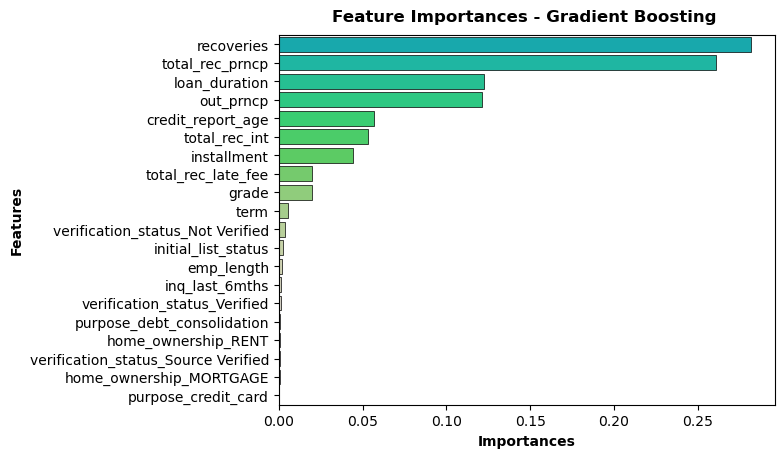

In [95]:
# Import library
from colour import Color

# Create a gradient of colors from green to white
green = Color('#00bfc4')
colors = [str(color) for color in green.range_to(Color('white'), 20)]

# Create new Dataframe for feature importances
gb_tuned = random_search.best_estimator_
df_fi = pd.DataFrame({'Features': X_train.columns, 'Importances': gb_tuned.feature_importances_})
df_fi.sort_values('Importances', ascending=False, ignore_index=True, inplace=True)

# Create a barchart
sns.barplot(data=df_fi, x='Importances', y='Features', palette=colors, linewidth=0.5, edgecolor='black', orient='h')

# Adjust x and y label
plt.xlabel('Importances', fontweight='bold')
plt.ylabel('Features', fontweight='bold')

# Add title
plt.title('Feature Importances - Gradient Boosting ', fontweight='bold', pad=10)

# Show the graph
plt.show()

#### Observation:
Based on **feature importances** from Gradient Boosting model, the top 10 features that have the **highest contributions** in making accurate predictions are the **recoveries**, **total_rec_prncp**, **loan_duration**, **out_prncp**, **credit_report_age**, **total_rec_int**, **installment**, **total_rec_late_fee**, **grade**, and **term** features.

### 3.5. SHAP Values

In [61]:
# Instal SHAP
!pip install shap

In [62]:
# Import library
import shap

# Initialize the SHAP explainer with the trained gradent boosting model
explainer = shap.Explainer(gb_tuned)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

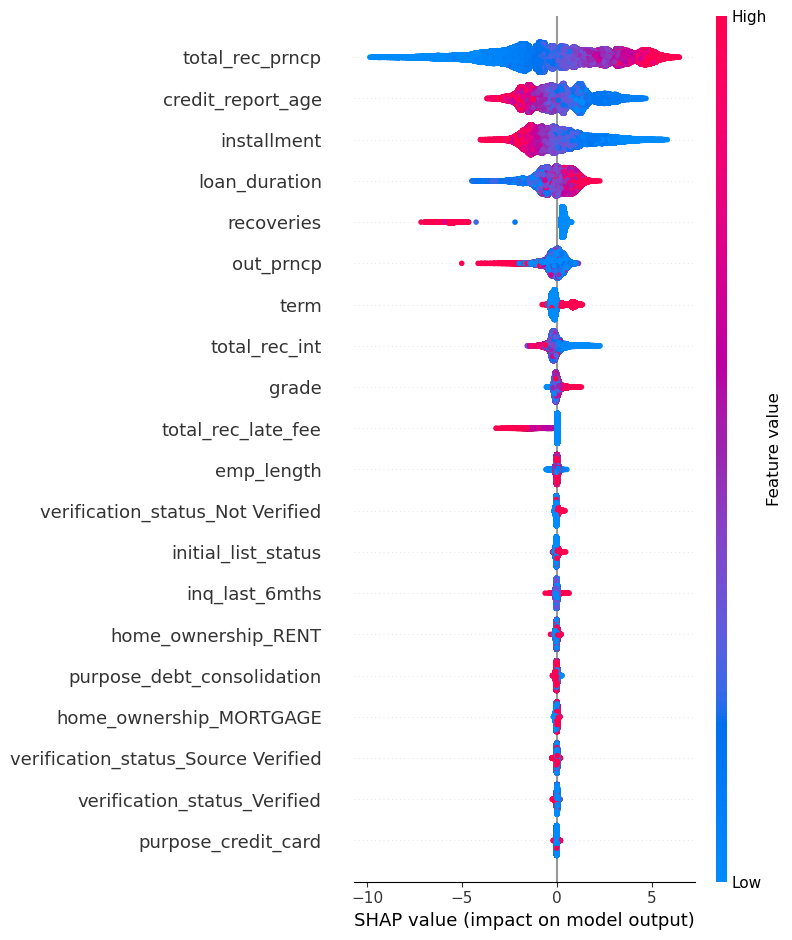

In [63]:
# Create a summary plot
shap.summary_plot(shap_values, X_test)

#### Observation:
Then, from the **SHAP values** we can see the impact of each feature on the model output. The features that have the higher value tend to be **good credit** namely **total_rec_prncp**, **loan_duration**, **term**, and **grade**. Meanwhile, the features that have the higher value tend to be **bad credit** namely **credit_report_age**, **installment**, **recoveries**, **out_prncp**, **total_rec_int**, and **total_rec_late_fee**.

### 3.6. Confusion Matrix

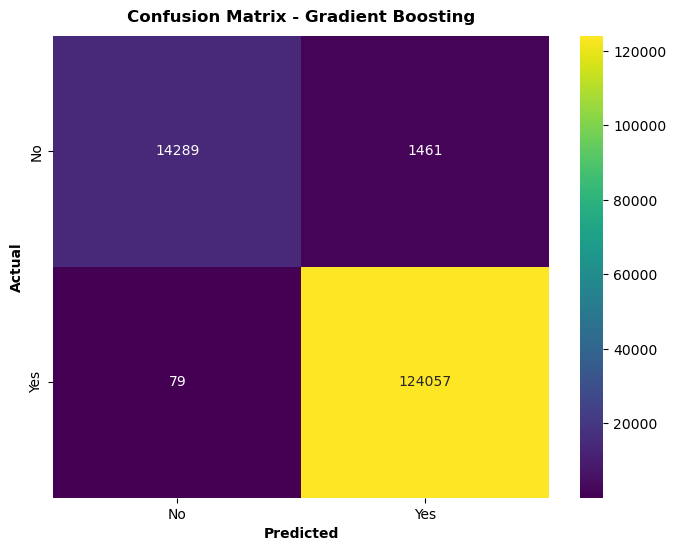

In [66]:
# Import library
from sklearn.metrics import confusion_matrix

# Model predictions
y_pred = gb_tuned.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "viridis", xticklabels= ['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Gradient Boosting', pad = 10, fontweight = 'bold', fontsize = 12)
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.show()

By using the results of *hyperparameter tuning* for the Gradient Boosting model, we train the model again to get a **confusion matrix** as shown above, with the following results:

- **True Positive**: Predicted the loan was approved and it turned out to be correct 124,057 times.
- **True Negative**: Predicted the loan was not approved and it turned out to be correct 14,289 times.
- **False Positive**: Predicted the loan was approved and turned out to be wrong by 1,461 times.
- **False Negative**: Predicted the loan was not approved and turned out to be wrong 79 times.

## 4. Business Simulation

In [94]:
# Show the ratio of target variable label
print(f'Number of Customers: {len(df)}')
print('-' * 20)
print('Good loan ratio:')
df['loan_approved'].value_counts(normalize = True)

Number of Customers: 466285
--------------------
Good loan ratio:


1    0.888081
0    0.111919
Name: loan_approved, dtype: float64

****
**Before Using Machine Learning Model:**
- Good Loans = 0.888 * 466,285 = 414,061
- Bad Loans = 0.112 * 466,285 = 52,224

**After Using Machine Learning Model:**
- Good Loans = 0.988 * 466,285 = 460,690
- Bad Loans = 0.012 * 466,285 = 5,595

**Percentage:**
- Good Loans = ((460,690 - 414,061) / 414,061) * 100% = +11.26%
- Bad Loans = ((5,595 - 52,224) / 52,224) * 100% = -89.29%
****

#### Conclusion:
After using machine learning, the number of **good loans increased by 11.26%** to 98.8% or the number of **bad loans decreased by 89.29%** to 1.2%.